<a href="https://colab.research.google.com/github/VictorRocasa/Processamento_de_Imagens/blob/master/PI_Tarefas_da_Segunda_Semana_(ERE)_V%C3%ADctorR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

# 1. Extração de Região de Interesse (ROI)

Dessa vez você vai criar uma função chamada crop(). Essa função receberá por parâmetro uma imagem, uma posição x, y e uma altura e largura. A função deverá retornar o pedaço recortado.

Suponha a imagem abaixo, que chamaremos de messiImg.

<img src="https://i.stack.imgur.com/6QscS.jpg"/>

Se sua função for chamada assim:

x_bola = 336
y_bola = 287
largura_bola = 163
altura_bola = 49
ballImg = crop(messiImg, x_bola, y_bola, largura_bola, altura_bola)

Ao final, ballImg deve conter apenas a imagem da bola.

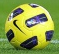

Imagem original


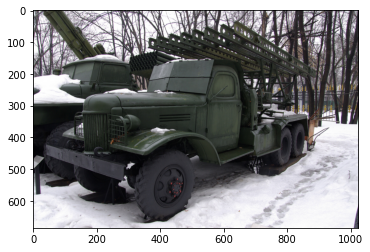

Imagem Cortada


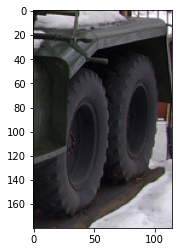

True

In [262]:
#Insira seu código abaixo!
import numpy as np
import cv2

def crop(imagem, x, y, l, a):
  img_cortada = imagem[y:y+a, x:x+l]
  return img_cortada

x_rodas = 750
y_rodas = 320
largura_rodas = 115
altura_rodas = 180

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/katushinha.jpg")

from matplotlib import  pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Imagem original")
plt.imshow(img)
plt.show()
rodasImg = crop(img, x_rodas, y_rodas, largura_rodas, altura_rodas)
print("Imagem Cortada")
plt.imshow(rodasImg)
plt.show()
rodasImg = cv2.cvtColor(rodasImg, cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/rodasImg.jpg', rodasImg)#salvando recorte da imagem para usar no exercicio de baixo

# 2. Colar Imagem

Agora você criará uma função que "cola" uma imagem menor em uma imagem maior.

Crie uma função chamada paste() que receberá, como parâmetro, uma imagem src (source), uma imagem dst (destiny) e uma posição x, y qualquer. Ela retornará a imagem modificada.

A imagem dst será "colada" na posição x, y da imagem src. Confira o exemplo abaixo.

newImg = paste(messiImg, ballImg, x, y)

É assim que ficará a imagem "newImg" (de acordo com a posição x e y)

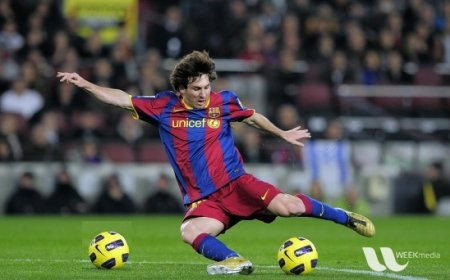

Imagem original + parte colada


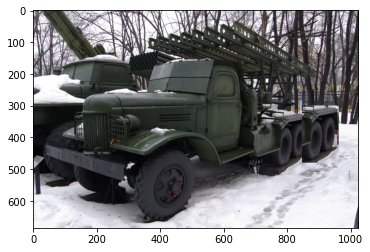

In [263]:
#Insira seu código abaixo!
import numpy as np
import cv2

def paste(imagem0, imagem1, x, y):
  altura1, largura1, canais = imagem1.shape
  larguraF = largura1 + x
  alturaF = altura1+y
  imagem0[y:alturaF, x:larguraF] = imagem1
  return imagem0

dst = cv2.imread("/content/drive/My Drive/Colab Notebooks/katushinha.jpg")
src = cv2.imread("/content/drive/My Drive/Colab Notebooks/rodasImg.jpg") 
xCola = 845
yCola = 300

from matplotlib import  pyplot as plt
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
dst = paste(dst,src,xCola,yCola)
print("Imagem original + parte colada")
plt.imshow(dst)
plt.show()

# 3. Trabalhando com Canais de Cores

Dessa vez, você deverá criar um algoritmo para saber qual imagem é mais "vermelha", "verde" ou "azul".

Para isso, você deverá pegar uma imagem qualquer e extrair cada um dos canais dela, em separado. Assim, você irá gerar 3 novas imagens, uma contendo apenas o canal vermelho, outra contendo somente o verde e a última, azul.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png"/>

A seguir, você tirará a média de cores da imagem (somar os tons de todos os pixels e dividir pelo total de pixels). Se a imagem do canal vermelho tiver a maior média, então a imagem é mais "vermelha" e assim por diante!

Imagem Original


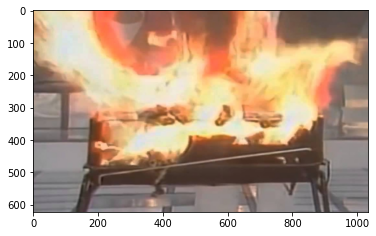

Canal Vermelho


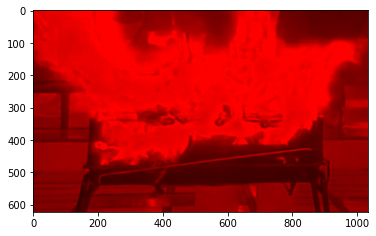

Canal Verde


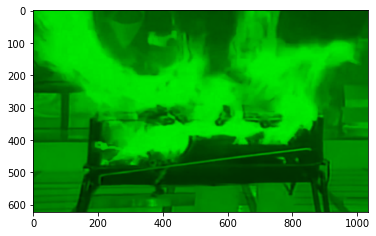

Canal Azul


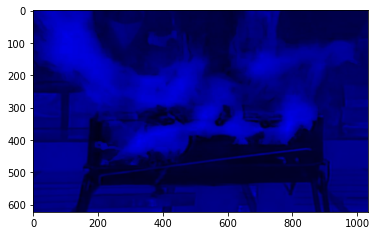

Media do canal vermelho:  0.2155696911135536


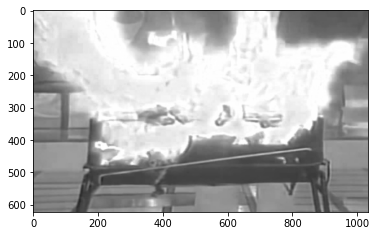

Media do canal verde:  0.2040948649875744


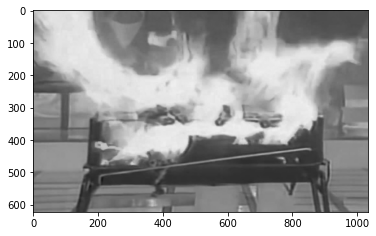

Media do canal azul:  0.20697601034833243


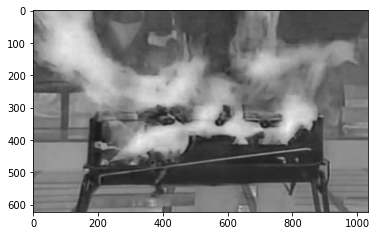

A imagem é predominantemente vermelha.


In [264]:
#Insira seu código abaixo!
import numpy as np
import cv2

def getVermelho(img):
  imagem = img.copy()
  altura, largura, canais = imagem.shape
  for y in range(0, altura):
    for x in range(0, largura):
      imagem.itemset((y,x,1),0)
      imagem.itemset((y,x,2),0)
  return imagem

def getVerde(img):
  imagem = img.copy()
  altura, largura, canais = imagem.shape
  for y in range(0, altura):
    for x in range(0, largura):
      imagem.itemset((y,x,0),0)
      imagem.itemset((y,x,2),0)
  return imagem

def getAzul(img):
  imagem = img.copy()
  altura, largura, canais = imagem.shape
  for y in range(0, altura):
    for x in range(0, largura):
      imagem.itemset((y,x,0),0)
      imagem.itemset((y,x,1),0)
  return imagem

def getCinza(img, canalDominante):
  imagem = img.copy()
  altura, largura, canais = imagem.shape
  media = 0
  for y in range(0, altura):
    for x in range(0, largura):
      dominante = imagem.item(y,x,canalDominante)
      imagem.itemset((y,x,0),dominante)
      imagem.itemset((y,x,1),dominante)
      imagem.itemset((y,x,2),dominante)
      media = media + dominante
    media = media/(altura*largura) 
  return imagem,media


img = cv2.imread("/content/drive/My Drive/Colab Notebooks/curry.jpg")

from matplotlib import  pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = getVermelho(img)
g = getVerde(img)
b = getAzul(img)
print("Imagem Original")
plt.imshow(img)
plt.show()
print("Canal Vermelho")
plt.imshow(r)
plt.show()
print("Canal Verde")
plt.imshow(g)
plt.show()
print("Canal Azul")
plt.imshow(b)
plt.show()
rc, mediaR = getCinza(r, 0)
print("Media do canal vermelho: ", mediaR)
plt.imshow(rc)
plt.show()
gc, mediaG = getCinza(g, 1)
print("Media do canal verde: ", mediaG)
plt.imshow(gc)
plt.show()
bc, mediaB = getCinza(b, 2)
print("Media do canal azul: ", mediaB)
plt.imshow(bc)
plt.show()

if(mediaR > mediaG and mediaR > mediaB):
  maior = "vermelha."
elif(mediaG > mediaR and mediaG > mediaB):
  maior = "verde."
elif(mediaB > mediaR and mediaB > mediaG):
  maior = "azul."
print("A imagem é predominantemente",maior)

# 4. Criando o ouriço brasileiro

Existe um jogo na Internet chamado "Brasonic", que consiste numa versão tupiniquim do ouriço mais popular dos jogos, Sonic. Basicamente, ele é uma versão do personagem trocando suas cores pelo verde e amarelo da bandeira nacional.

Nesse exercício, você deverá fazer um algoritmo que "recebe" uma imagem do Sonic e "troca" suas cores para o verde e amarelo. Para tal, modifique os pixels e salve a nova imagem em disco!

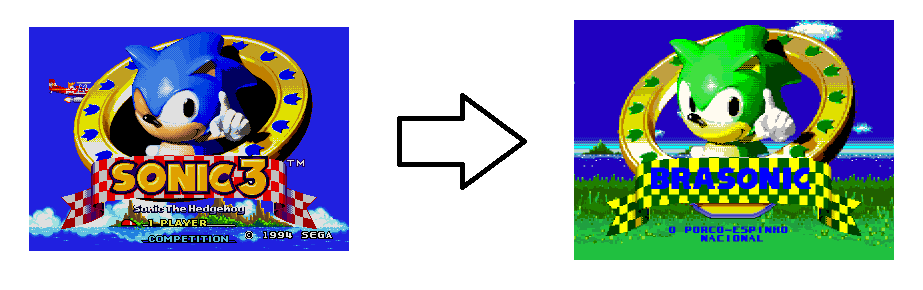

Imagem original


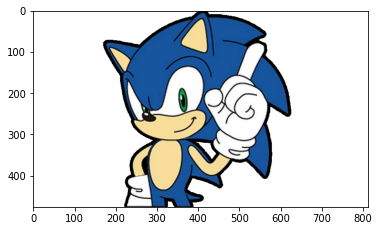

Ouriço brasileiro


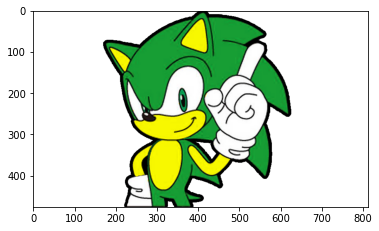

True

In [265]:
#Insira seu código abaixo

def determinaCor(imagem, y, x):
  R = imagem.item(y,x,0)
  G = imagem.item(y,x,1)
  B = imagem.item(y,x,2)
  cor_media = (R+G+B)/3
  if(R >= cor_media+15):
    tendenciaR = True
  else:
    tendenciaR = False
  if(G >= cor_media+15):
    tendenciaG = True
  else:
    tendenciaG = False
  if(B >= cor_media+15):
    tendenciaB = True
  else:
    tendenciaB = False

  if(not tendenciaR and not tendenciaG and not tendenciaB):#branco, preto, cinza ou uma cor muito proxima dessas(não mexe)
    return -1
  elif(not tendenciaR and not tendenciaG and tendenciaB):#azul(vai se tornar verde)
    return 0
  elif(not tendenciaR and tendenciaG and not tendenciaB):#verde (continua verde)
    return -1
  elif((tendenciaR and tendenciaG and not tendenciaB) or not(tendenciaR and tendenciaG and not tendenciaB)):#se for amarelo ou não for amarelo, retorna 1
    return 1
  else:
    return -1


def mudaCor(imagem, y, x, cor):
  if(cor == 0):#inverte os valores de azul e verde
    imagem.itemset((y,x,1),imagem.item(y,x,2))
    imagem.itemset((y,x,2),(imagem.item(y,x,1))/3)#azul/3 para deixar o verde mais claro
  else:
    rg = (imagem.item(y, x, 0) - imagem.item(y, x, 1))#vermelho-verde: para igualar os 2 e garantir amarelo
    imagem.itemset((y,x,0),imagem.item(y, x, 0))
    imagem.itemset((y,x,1), imagem.item(y, x, 1)+rg)
    imagem.itemset((y,x,2),0)


import cv2
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/sonic.jpg")
from matplotlib import  pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Imagem original")
plt.imshow(img)
plt.show()
altura, largura, canais = img.shape
for i in range(0, altura):
  for j in range(0, largura):
    cor = determinaCor(img, i,j)#Recebe um código para a cor
    if(cor != -1):#se retornou -1 não altera a cor
      mudaCor(img, i, j, cor)
print("Ouriço brasileiro")
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Brasonic.jpg', img)#salvando recorte da imagem para usar no exercicio de baixo

# 5. Junte pessoas usando Alpha Blending

No vídeo abaixo (um pouco mais antigo) eu fiz uma "brincadeira" misturando o rosto de dois políticos brasileiros que antagonizam. Eu fiz isso usando a técnica de transparência por alpha blending. 

<a href="https://www.youtube.com/watch?v=_NRIjiFnYlM"><img src="https://img.youtube.com/vi/_NRIjiFnYlM/mqdefault.jpg"/></a>

Agora é a sua vez! Pegue duas fotos (se você se sentir a vontade, pode ser uma sua e de um amigo que concorde) e crie uma versão híbrida de vocês.

Ovo: 


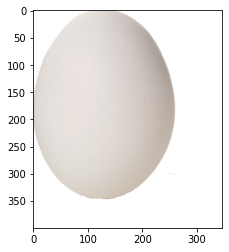

Batata: 


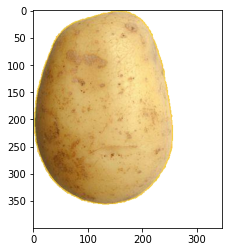

Ovatato(infelizmente a fusão de um ovo e uma batata não parece ser muito saborosa): 


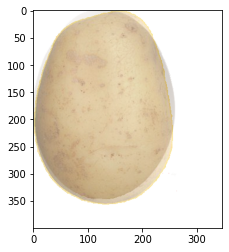

In [266]:
#Insira seu código abaixo
import cv2
import numpy as np

ovo = cv2.imread("/content/drive/My Drive/Colab Notebooks/ovo.png")
ovo = cv2.cvtColor(ovo, cv2.COLOR_BGR2RGB)
batata = cv2.imread("/content/drive/My Drive/Colab Notebooks/batata.png")
batata = cv2.cvtColor(batata, cv2.COLOR_BGR2RGB)

print("Ovo: ")
plt.imshow(ovo)
plt.show()
print("Batata: ")
plt.imshow(batata)
plt.show()

ovatato = cv2.addWeighted(ovo,0.5,batata,0.5,0)

print("Ovatato(infelizmente a fusão de um ovo e uma batata não parece ser muito saborosa): ")
plt.imshow(ovatato)
plt.show()